In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gzip as gz
import json
import pickle
import torch

# Raw Data Analysis


In [4]:
with gz.open('raw/superblue1/superblue1.json.gz', 'rt') as f:  # 'rt' means read text
    data = json.load(f)

In [5]:
len(set([(x['xloc'], x['yloc']) for x in data['instances']]))

433

In [ ]:
set([(x['xloc'], x['yloc']) for x in data['instances']])

In [7]:
len(data['instances'])

797938

In [8]:
with gz.open('raw/superblue1/1/superblue1.json.gz', 'rt') as f:  # 'rt' means read text
    data = json.load(f)

In [ ]:
set([(x['xloc'], x['yloc']) for x in data['instances']])

# Processed Data Analysis

In [6]:
# Path to your .pkl file
file_path = "../../data/superblue/superblue_1/node_neighbor_features.pkl"

# Open and load the file
with open(file_path, 'rb') as file:  # 'rb' mode opens the file in binary read mode
    data = pickle.load(file)

# Display the data
print(data)

{'pd': array([[0.57659997, 3.78525   , 2.84100841, ..., 0.        , 0.        ,
        0.        ],
       [1.1236587 , 2.59016081, 0.48024168, ..., 0.        , 0.        ,
        0.        ],
       [1.1236587 , 2.59016081, 0.48024168, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.95083978, 0.6301005 ,
        0.03481547],
       [0.        , 0.        , 0.        , ..., 1.14630555, 1.43355668,
        0.14265637],
       [0.        , 0.        , 0.        , ..., 1.44839475, 1.73426691,
        0.1504663 ]]), 'neighbor': array([[ 3.,  5.,  7., ...,  1.,  1.,  1.],
       [ 3., 10., 20., ...,  1.,  1.,  1.],
       [ 3., 10., 20., ...,  1.,  1.,  1.],
       ...,
       [ 1.,  1.,  1., ...,  7.,  6.,  5.],
       [ 1.,  1.,  1., ...,  7.,  9.,  8.],
       [ 1.,  1.,  1., ...,  7.,  7.,  7.]])}


In [10]:
data.keys()

dict_keys(['pd', 'neighbor'])

In [11]:
data['neighbor']

array([[ 3.,  5.,  7., ...,  1.,  1.,  1.],
       [ 3., 10., 20., ...,  1.,  1.,  1.],
       [ 3., 10., 20., ...,  1.,  1.,  1.],
       ...,
       [ 1.,  1.,  1., ...,  7.,  6.,  5.],
       [ 1.,  1.,  1., ...,  7.,  9.,  8.],
       [ 1.,  1.,  1., ...,  7.,  7.,  7.]])

In [4]:
file_path = "../../data/superblue/superblue_1/pyg_data.pkl"

# Open and load the file
with open(file_path, 'rb') as file:  # 'rb' mode opens the file in binary read mode
    data = torch.load(file)

# Display the data
print(data)

/var/folders/n3/dkf1dhtx7_z72kxwtk9dwfpr0000gn/T/ipykernel_4134/1692589509.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(file)


Data(node_features=[797938, 45], net_features=[821523, 11], edge_index_sink_to_net=[2, 2139097], edge_index_source_to_net=[2, 810922], node_demand=[797938], net_demand=[821523], net_hpwl=[821523], batch=[797938], num_vn=99, pos_lst=[797938, 2])


In [13]:
data.keys()

['net_hpwl',
 'batch',
 'pos_lst',
 'edge_index_sink_to_net',
 'net_demand',
 'node_demand',
 'net_features',
 'edge_index_source_to_net',
 'node_features',
 'num_vn']

In [14]:
len(data['node_features'])

797938

In [15]:
# pos_lst has phyiscal location of every cell instance
data['pos_lst'].shape

torch.Size([797938, 2])

In [16]:
np.mean([x[0] for x in data['pos_lst']])

0.57940125

In [17]:
x, y = zip(*data['pos_lst'])

In [18]:
len(x)

797938

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


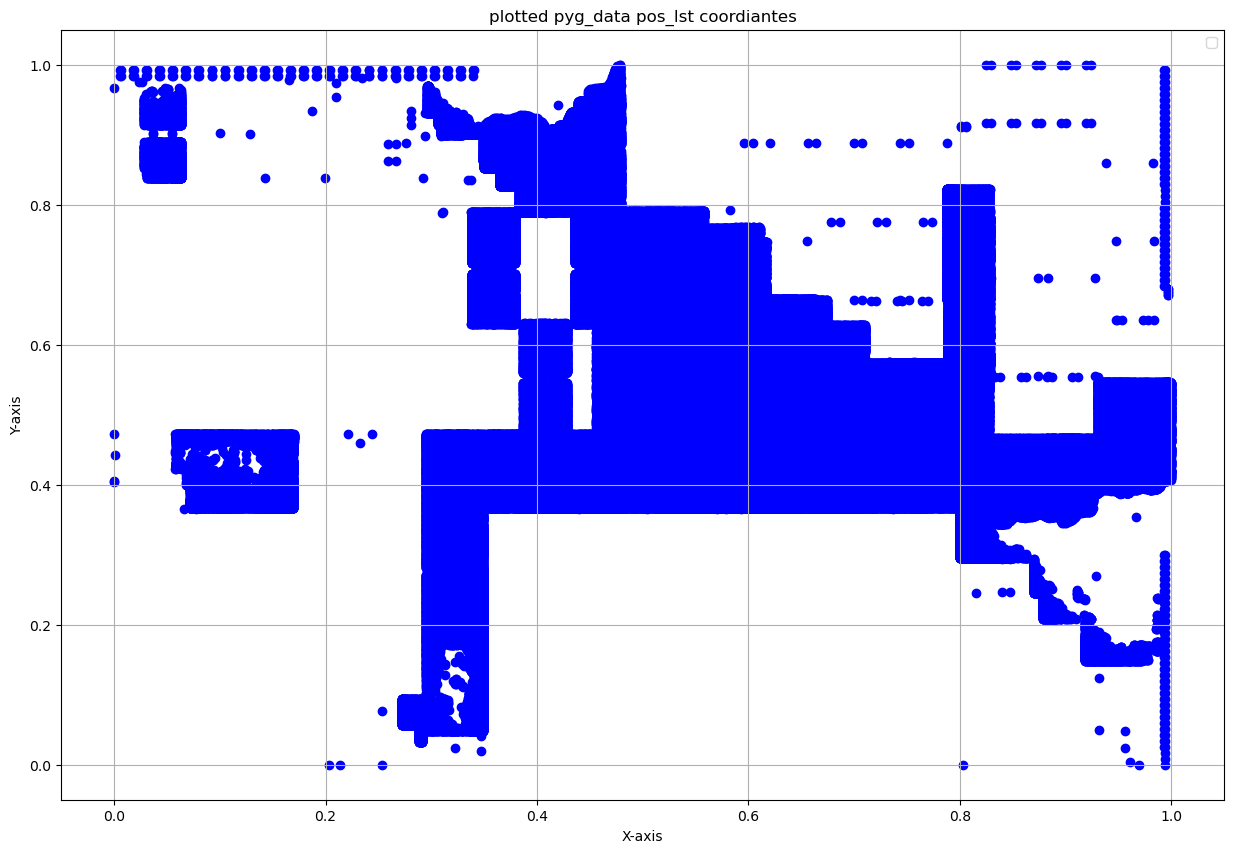

In [19]:
plt.figure(figsize=(15, 10))
plt.scatter(x, y, color='blue')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Show the grid
plt.grid(True)

# Display the plot
plt.title('plotted pyg_data pos_lst coordiantes')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


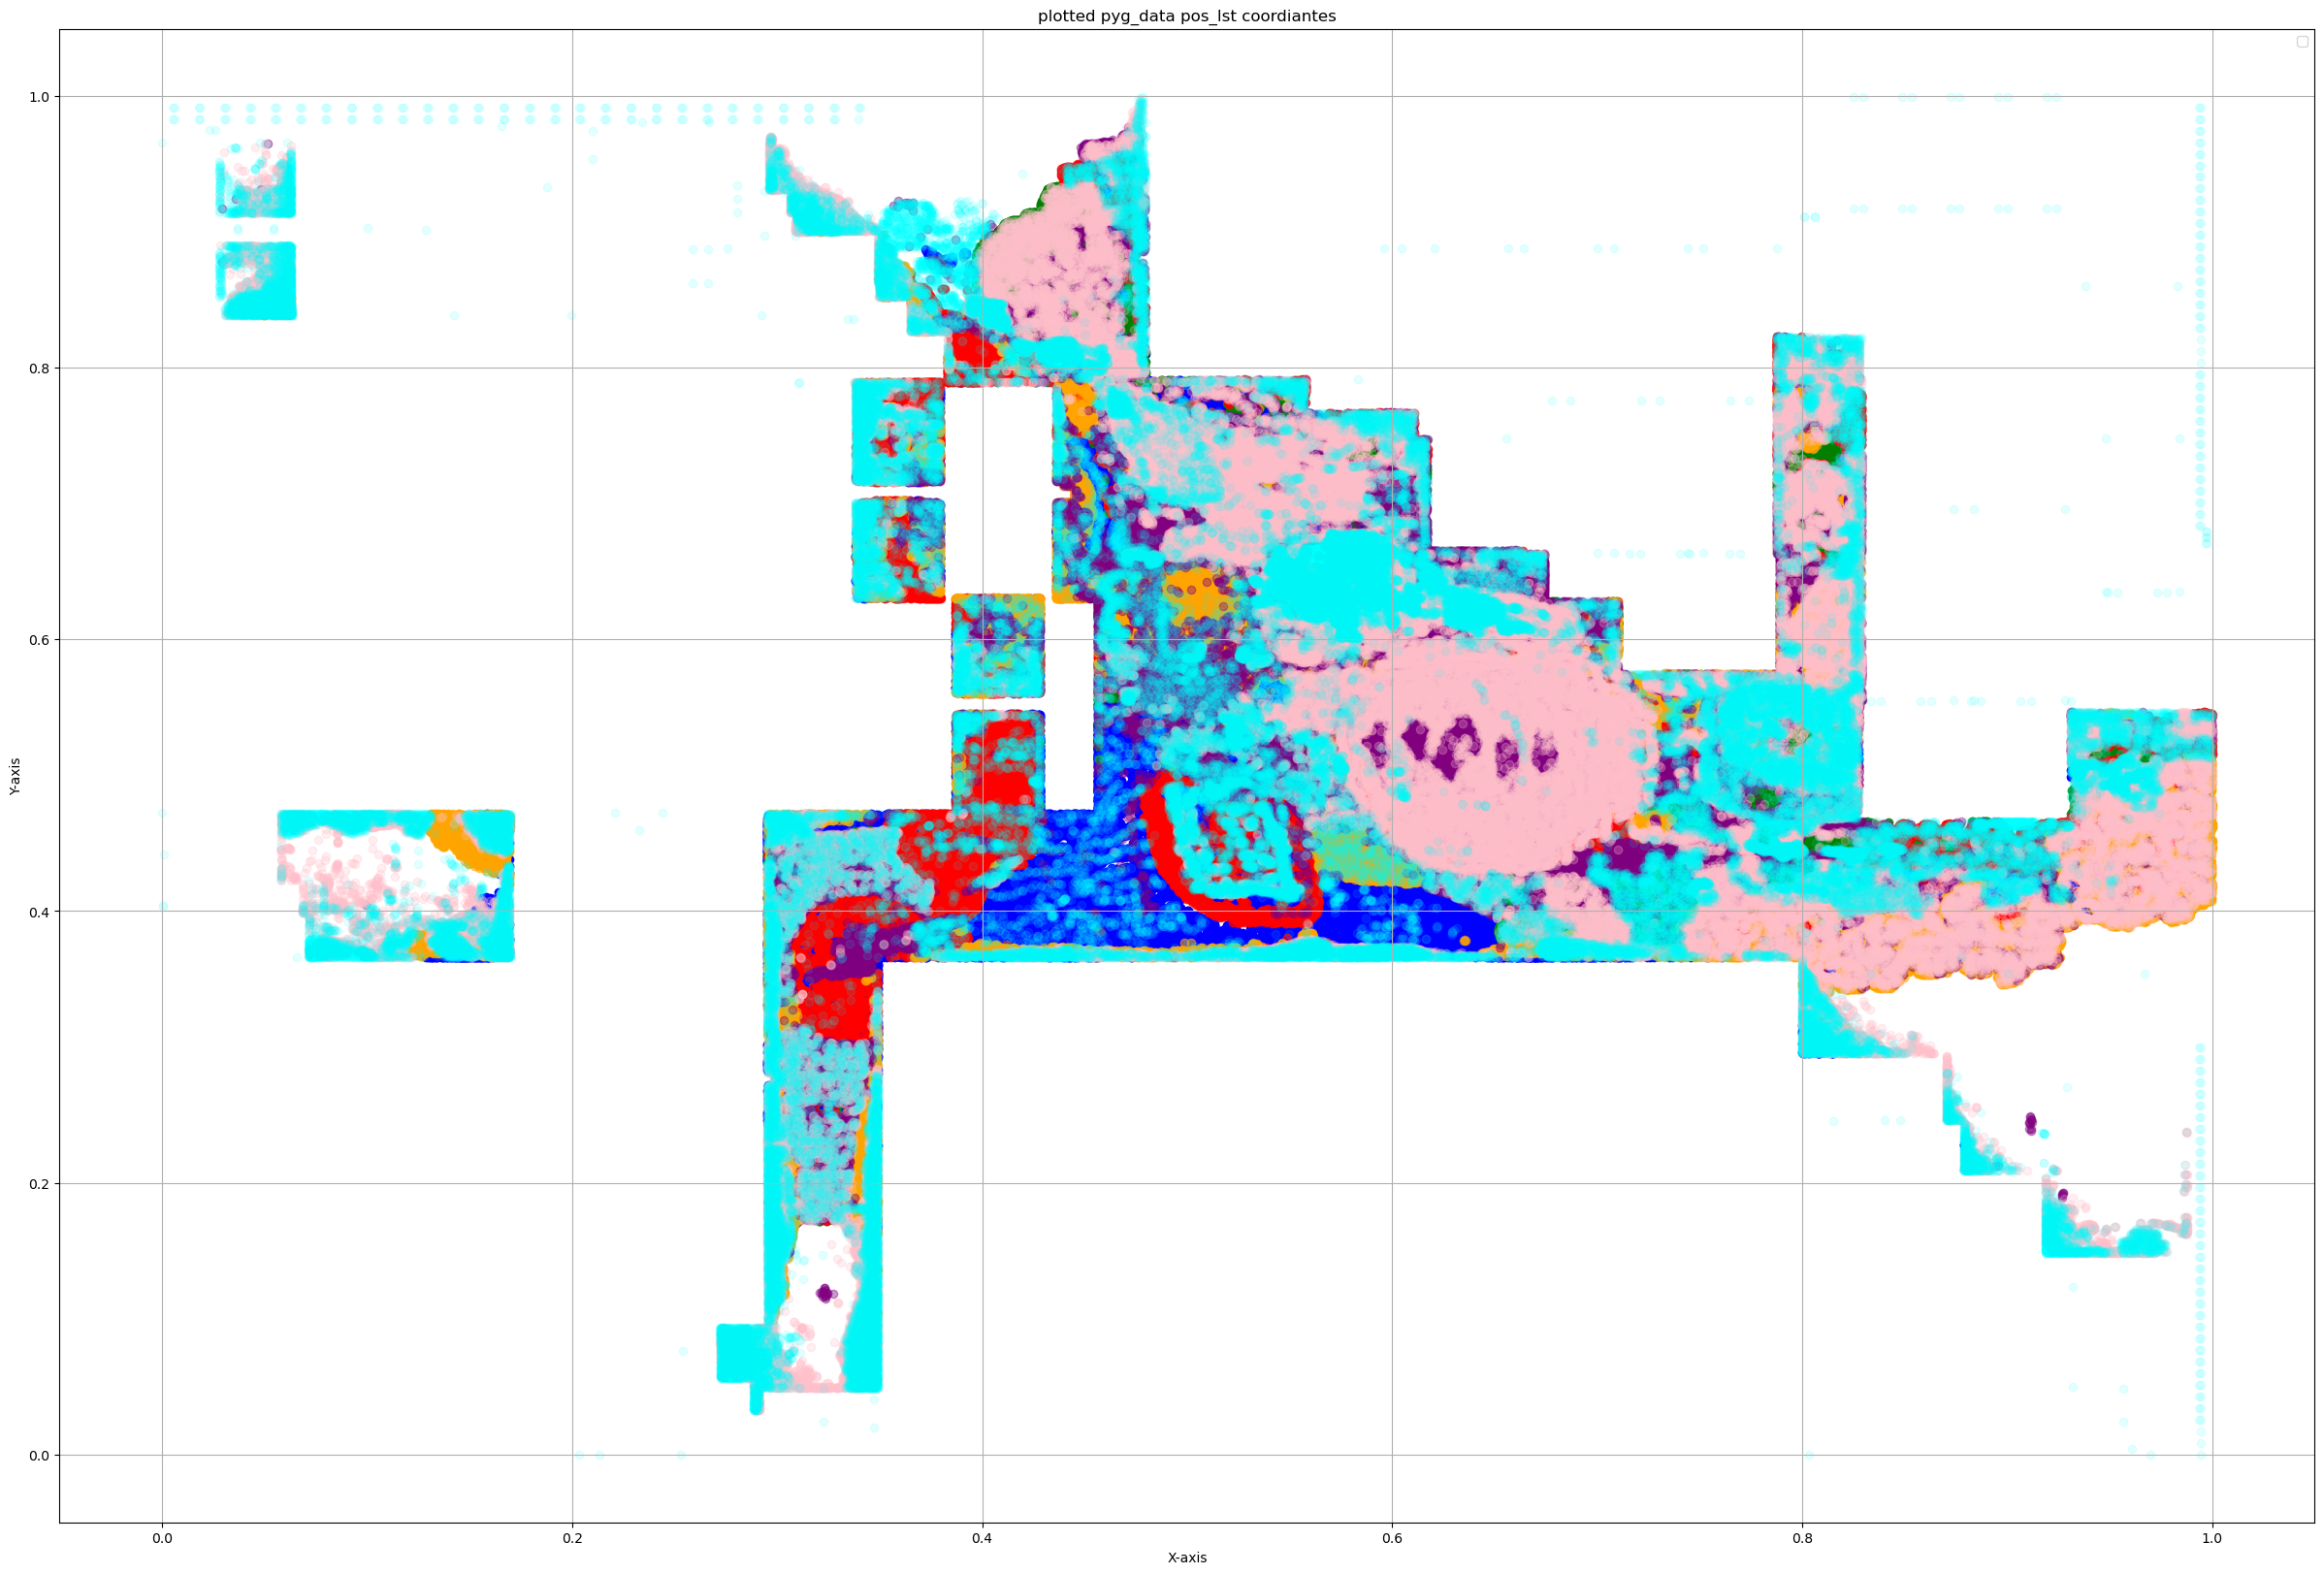

In [20]:
plt.figure(figsize=(30, 20))
plt.scatter(x[:100000], y[:100000], color='blue', alpha=1)  # Scatter plot for individual points
plt.scatter(x[100000:200000], y[100000:200000], color='green', alpha=0.85)  # Scatter plot for individual points
plt.scatter(x[200000:300000], y[200000:300000], color='red', alpha=0.7)  # Scatter plot for individual points
plt.scatter(x[300000:400000], y[300000:400000], color='orange', alpha=0.55)  # Scatter plot for individual points
plt.scatter(x[400000:500000], y[400000:500000], color='purple', alpha=0.4)  # Scatter plot for individual points
plt.scatter(x[600000:700000], y[600000:700000], color='pink', alpha=0.25)  # Scatter plot for individual points
plt.scatter(x[700000:], y[700000:], color='cyan', alpha=0.1)  # Scatter plot for individual points


# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Show the grid
plt.grid(True)

# Display the plot
plt.title('plotted pyg_data pos_lst coordiantes')
plt.show()

In [21]:
print(len(data['pos_lst']))
print(len(set([(x[0], x[1]) for x in data['pos_lst']])))

797938
797938


In [22]:
a = [(1.1, 1.1), (1.1, 1.1)]

In [23]:
set(a)

{(1.1, 1.1)}

In [24]:
data.keys()

['net_hpwl',
 'batch',
 'pos_lst',
 'edge_index_sink_to_net',
 'net_demand',
 'node_demand',
 'net_features',
 'edge_index_source_to_net',
 'node_features',
 'num_vn']

In [25]:
len(data['edge_index_source_to_net'][1])

810936

In [26]:
len(data['edge_index_sink_to_net'][0])

2139111

In [5]:
# source/dest cell id (first tensor) --> net id (second tensor)
data['edge_index_source_to_net']

tensor([[ 658922,  774971,  774865,  ...,  797723,  797724,  797725],
        [ 797943,  797944,  797945,  ..., 1619458, 1619459, 1619460]])

In [6]:
# sink/origin cell id (first tensor) --> net id (second tensor)
data['edge_index_sink_to_net']

tensor([[ 478481,  478482,  478483,  ...,  738340,  797725,  738342],
        [ 797938,  797938,  797938,  ..., 1619458, 1619459, 1619460]])

In [29]:
# net IDs start from 797938
torch.max(data['edge_index_sink_to_net'][1]) - torch.min(data['edge_index_sink_to_net'][1])

tensor(821536)

In [30]:
data['net_features'].shape

torch.Size([821537, 11])

In [31]:
data['node_features'].shape

torch.Size([797938, 45])

In [32]:
# Num of unique nets connected to source cells, num of unique nets connected to sink cells
print(len(torch.unique(data['edge_index_source_to_net'][1])))
print(len(torch.unique(data['edge_index_sink_to_net'][1])))

810936
813905


In [33]:
# Number of unique nets used in superblue1
torch.unique(torch.cat([torch.unique(data['edge_index_source_to_net'][1]), torch.unique(data['edge_index_sink_to_net'][1])])).shape

torch.Size([820680])

In [8]:
concat = data['edge_index_sink_to_net'][1].tolist() + (data['edge_index_source_to_net'][1].tolist())
concat2 = data['edge_index_sink_to_net'][0].tolist() + (data['edge_index_source_to_net'][0].tolist())
print(len(concat))
print(len(concat2))
print(len(set(concat)))
print(len(set(concat2)))

2950019
2950019
820666
797681


In [20]:
from collections import defaultdict
# Given input lists
hyperedge_id_list = data['edge_index_sink_to_net'][1].tolist() + data['edge_index_source_to_net'][1].tolist()
node_id_list = data['edge_index_sink_to_net'][0].tolist() + data['edge_index_source_to_net'][0].tolist()

# Step 1: Organize nodes by hyperedge
hyperedge_dict = defaultdict(set)
for hyperedge, node in zip(hyperedge_id_list, node_id_list):
    hyperedge_dict[hyperedge].add(node)

# Step 2: Convert to hyperedges & hyperedge_indices format
hyperedges = []
hyperedge_indices = []
current_index = 0

for hyperedge in sorted(hyperedge_dict.keys()):  # Ensure order
    nodes = hyperedge_dict[hyperedge]
    hyperedge_indices.append(current_index)
    hyperedges.extend(nodes)
    current_index += len(nodes)

i = 0
for k, v in hyperedge_dict.items():
    #print(k,':' ,v)
    #i += 1
    #if i > 10:
    #     break
    if len(v) == 0:
        print(k, v)
print(hyperedges[:10])
print(hyperedge_indices[:10])
print(len(hyperedges))
print(len(hyperedge_indices))
print(hyperedge_indices == sorted(hyperedge_indices))

[524288, 524289, 524290, 524291, 524292, 524293, 524294, 524295, 524297, 524298]
[0, 140605, 140606, 140607, 140608, 140609, 140610, 140611, 140612, 140613]
2948927
820666
True


# Random Walk Algo


In [34]:
source_to_net = data['edge_index_source_to_net']
sink_to_net = data['edge_index_sink_to_net']

1. specify source cell to start at
2. take net id it is connected to from source_to_net
3. from sink_to_net, get all sinks attached to net id
4. take one cell at random
5. repeat steps 1-4 (can choose to not repeat visited cells)

In [35]:
source_to_net

tensor([[ 658922,  774971,  774865,  ...,  251265,  655325,  655325],
        [ 797943,  797944,  797945,  ..., 1619472, 1619473, 1619474]])

In [36]:
sink_to_net

tensor([[ 478481,  478482,  478483,  ...,  572072,  727951,  636673],
        [ 797938,  797938,  797938,  ..., 1619472, 1619473, 1619474]])

In [37]:
start_cell = source_to_net[0][torch.randint(0, len(source_to_net[0]), (1,))].item()
start_net = source_to_net[1][source_to_net[0] == start_cell]
start_net
def random_walk_no_revisit(start_node, source_to_net, sink_to_net, max_steps=100):
    """
    Performs random walk starting from given node, without revisiting nodes
    
    Args:
        start_node: Starting node ID
        source_to_net: Edge index tensor connecting source nodes to nets
        sink_to_net: Edge index tensor connecting sink nodes to nets 
        max_steps: Maximum number of steps to take
        
    Returns:
        path: List of visited node IDs in order
    """
    
    visited = set([start_node])
    path = [start_node]
    current_node = start_node
    
    for _ in range(max_steps):
        # Get nets connected to current node
        connected_nets = source_to_net[1][source_to_net[0] == current_node]
        
        if len(connected_nets) == 0:
            break
            
        # Randomly select one of the connected nets
        selected_net = connected_nets[torch.randint(0, len(connected_nets), (1,))]
        
        # Get all sink nodes connected to selected net
        possible_next_nodes = sink_to_net[0][sink_to_net[1] == selected_net]
        
        # Filter out already visited nodes
        unvisited_nodes = [n.item() for n in possible_next_nodes if n.item() not in visited]
        
        if not unvisited_nodes:
            break
            
        # Randomly select next unvisited node
        next_node = unvisited_nodes[torch.randint(0, len(unvisited_nodes), (1,)).item()]
        
        visited.add(next_node)
        path.append(next_node)
        current_node = next_node
    # Calculate distances from start position
    start_pos = data['pos_lst'][start_node]
    distances = []
    for node in path:
        pos = data['pos_lst'][node]
        dist = torch.sqrt(((pos[0] - start_pos[0])**2 + (pos[1] - start_pos[1])**2).float())
        distances.append((node, round(dist.item(), 7)))
    return distances

valid_pairs = []
# Example usage
for _ in range(10):
    start_cell = source_to_net[0][torch.randint(0, len(source_to_net[0]), (1,))].item()
    start_net = source_to_net[1][source_to_net[0] == start_cell]
    path = random_walk_no_revisit(start_cell, source_to_net, sink_to_net)
    for i in range(5, len(path)):
        if path[i][1] < 0.01:
            valid_pairs.append((path[0][0], path[i][0]))
    print(f"Random walk path starting from node {start_cell}:")
    print(path)
print()
print("Valid Pairs:")
print(valid_pairs)

Random walk path starting from node 320435:
[(320435, 0.0), (265591, 0.0131725), (504099, 0.0154096), (316279, 0.0251672), (348915, 0.021212), (270915, 0.021248), (270893, 0.0208987), (504076, 0.0216796), (259884, 0.0081097), (259895, 0.01292), (259906, 0.0145338), (259917, 0.0145366), (504100, 0.0150477), (243261, 0.0441436), (243150, 0.0435999), (39647, 0.0282663), (39869, 0.0259461), (493877, 0.0276422), (39536, 0.027822)]
Random walk path starting from node 768474:
[(768474, 0.0), (650526, 0.0013226), (650525, 0.0030203), (650702, 0.013159), (768378, 0.0447379), (768180, 0.1727547), (732458, 0.1600638), (768436, 0.2730614), (768190, 0.2975056)]
Random walk path starting from node 420084:
[(420084, 0.0), (420083, 0.0008261), (609751, 0.0036407), (464908, 0.060264), (619231, 0.060287), (390950, 0.0376316), (389520, 0.0226476), (388273, 0.021885), (388271, 0.0226351), (601013, 0.0226511), (391466, 0.1212844), (391468, 0.1206043), (421985, 0.049951), (421987, 0.041169), (421301, 0.0094

# Part 2: Data Analysis of Valid Pairs

In [ ]:
# from tqdm import tqdm

# design_list = [1, 2, 3, 5, 6, 7, 9, 11, 14, 16]
# valid_pairs_all = []

# # Outer progress bar for designs
# for design in tqdm(design_list, desc="Processing designs", position=0):
#     print(f"\nProcessing design {design}")  # Print current design number
#     file_path = f"de_hnn/data/superblue/superblue_{design}/pyg_data.pkl"
#     with open(file_path, 'rb') as file:
#         data = torch.load(file)
#     source_to_net = data['edge_index_source_to_net']
#     sink_to_net = data['edge_index_sink_to_net']
    
#     # Inner progress bar for random walks within each design
#     for _ in tqdm(range(25), desc=f"Random walks for design {design}", 
#                  position=1, leave=True):  # Changed leave to True
#         start_cell = source_to_net[0][torch.randint(0, len(source_to_net[0]), (1,))].item()
#         start_net = source_to_net[1][source_to_net[0] == start_cell]
#         path = random_walk_no_revisit(start_cell, source_to_net, sink_to_net)
#         for i in range(5, len(path)):
#             if path[i][1] < 0.01:
#                 valid_pairs_all.append(((path[0][0], path[i][0]), design))
    
#     print()  # Add blank line between designs

# print("\nValid Pairs:")
# print(valid_pairs_all)

valid_pairs_all finds valid pairs of cells that are topologically far and physically close from every design of superblue available, the number after the tuple pair is the design number

right now, looking at 1000 random sources per design

In [83]:
design_list = [1, 2, 3, 5, 6, 7, 9, 11, 14, 16]
valid_pairs_all = []

# Outer progress bar for designs
for design in design_list:
    print(f"\nProcessing design {design}", flush=True)  # Added flush=True
    file_path = f"de_hnn/data/superblue/superblue_{design}/pyg_data.pkl"
    with open(file_path, 'rb') as file:
        data = torch.load(file)
    source_to_net = data['edge_index_source_to_net']
    sink_to_net = data['edge_index_sink_to_net']
    
    for i in range(100):  
        if i % 10 == 0:
            print(f"Processing design {design}, {i} walks completed")
        start_cell = source_to_net[0][torch.randint(0, len(source_to_net[0]), (1,))].item()
        start_net = source_to_net[1][source_to_net[0] == start_cell]
        path = random_walk_no_revisit(start_cell, source_to_net, sink_to_net)
        for i in range(5, len(path)):
            if path[i][1] < 0.01:
                valid_pairs_all.append(((path[0][0], path[i][0]), design))

print("\nValid Pairs:")
print(valid_pairs_all)


Processing design 1
Processing design 1, 0 walks completed


/var/folders/75/4b4y2mlx2yv_34rkxb83ydkr0000gn/T/ipykernel_27856/1442282098.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(file)


Processing design 1, 10 walks completed
Processing design 1, 20 walks completed
Processing design 1, 30 walks completed
Processing design 1, 40 walks completed
Processing design 1, 50 walks completed
Processing design 1, 60 walks completed
Processing design 1, 70 walks completed
Processing design 1, 80 walks completed
Processing design 1, 90 walks completed

Processing design 2
Processing design 2, 0 walks completed
Processing design 2, 10 walks completed
Processing design 2, 20 walks completed
Processing design 2, 30 walks completed
Processing design 2, 40 walks completed
Processing design 2, 50 walks completed
Processing design 2, 60 walks completed
Processing design 2, 70 walks completed
Processing design 2, 80 walks completed
Processing design 2, 90 walks completed

Processing design 3
Processing design 3, 0 walks completed
Processing design 3, 10 walks completed
Processing design 3, 20 walks completed
Processing design 3, 30 walks completed
Processing design 3, 40 walks completed


In [84]:
len(valid_pairs_all)

1614

In [85]:
len(design_list)

10

## Part 1

Taking results of purely random walks and adding dummy connections between the pairs

Note: most likely adding a dummy net between the two

In [38]:
241659 in source_to_net[0], 718013 in sink_to_net[0]

(True, True)

In [40]:
# get max net id
torch.max(torch.concat([source_to_net[1], sink_to_net[1]]))

tensor(1619474)

Add dummy nets with new net id unique from existing net ids

TBD on the net features of the dummy nets

In [41]:
# Path to your .pkl file
file_path = "de_hnn/data/superblue/superblue_1/pyg_data.pkl"

# Open and load the file
with open(file_path, 'rb') as file:  # 'rb' mode opens the file in binary read mode
    data = torch.load(file)

# Display the data
print(data)

Data(node_features=[797938, 45], net_features=[821537, 11], edge_index_sink_to_net=[2, 2139111], edge_index_source_to_net=[2, 810936], node_demand=[797938], net_demand=[821537], net_hpwl=[821537], batch=[797938], num_vn=99, pos_lst=[797938, 2])


/var/folders/75/4b4y2mlx2yv_34rkxb83ydkr0000gn/T/ipykernel_27856/1106579797.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(file)


In [42]:
data

Data(node_features=[797938, 45], net_features=[821537, 11], edge_index_sink_to_net=[2, 2139111], edge_index_source_to_net=[2, 810936], node_demand=[797938], net_demand=[821537], net_hpwl=[821537], batch=[797938], num_vn=99, pos_lst=[797938, 2])

Modifies the pyg_data.pkl to pyg_data_modified.pkl by adding new connections

initializes all of dummy nets with 0 features

In [43]:
max_net_id = torch.max(torch.concat([source_to_net[1], sink_to_net[1]]))
max_net_id += 1

In [44]:
max_net_id = int(max_net_id)

In [45]:
# new_connections = [
#     (241659, 1000000, True),   # Node 241659 as source to new net 1000000
#     (718013, 1000000, False),  # Node 718013 as sink to new net 1000000
#     # Add more connections as needed
# ]
new_connections = []
for pair in valid_pairs:
    new_connections.append((pair[0], max_net_id, True))
    new_connections.append((pair[1], max_net_id, False))
    max_net_id += 1


In [46]:
max_net_id

1619485

In [47]:
new_connections

[(320435, 1619475, True),
 (259884, 1619475, False),
 (420084, 1619476, True),
 (421301, 1619476, False),
 (420084, 1619477, True),
 (610176, 1619477, False),
 (81253, 1619478, True),
 (76172, 1619478, False),
 (81253, 1619479, True),
 (576559, 1619479, False),
 (81253, 1619480, True),
 (259789, 1619480, False),
 (49500, 1619481, True),
 (57288, 1619481, False),
 (237493, 1619482, True),
 (240031, 1619482, False),
 (237493, 1619483, True),
 (240030, 1619483, False),
 (306761, 1619484, True),
 (302630, 1619484, False)]

In [48]:
import torch
from torch_geometric.data import Data
import numpy as np

# Load existing data
data_path = "de_hnn/data/superblue/superblue_1/pyg_data.pkl"
data = torch.load(data_path)

def add_new_connections(data, new_connections):
    """
    Add new connections to the graph
    
    Parameters:
    - data: PyG Data object
    - new_connections: list of tuples [(node_id, net_id, is_source)]
                      where is_source is True for source connection, False for sink
    """
    # Get current number of nets
    current_num_nets = data.net_features.shape[0]
    num_new_nets = len(set(conn[1] for conn in new_connections)) # Count unique new nets
    
    # Create dummy features for new nets
    dummy_net_features = torch.zeros((num_new_nets, data.net_features.shape[1]))
    data.net_features = torch.cat([data.net_features, dummy_net_features], dim=0)
    
    # Create dummy net demands and HPWLs
    data.net_demand = torch.cat([
        data.net_demand,
        torch.zeros(num_new_nets)
    ])
    
    data.net_hpwl = torch.cat([
        data.net_hpwl,
        torch.zeros(num_new_nets)
    ])
    
    # Separate source and sink connections
    new_source_connections = []
    new_sink_connections = []
    
    for node_id, net_id, is_source in new_connections:
        if is_source:
            new_source_connections.append([node_id, net_id])
        else:
            new_sink_connections.append([node_id, net_id])
    
    # Add new source connections
    if new_source_connections:
        new_source_edges = torch.tensor(new_source_connections).t()
        data.edge_index_source_to_net = torch.cat([
            data.edge_index_source_to_net,
            new_source_edges
        ], dim=1)
    
    # Add new sink connections
    if new_sink_connections:
        new_sink_edges = torch.tensor(new_sink_connections).t()
        data.edge_index_sink_to_net = torch.cat([
            data.edge_index_sink_to_net,
            new_sink_edges
        ], dim=1)
    
    return data

# Example usage:
# Format: (node_id, net_id, is_source)
# net_ids should start from current_num_nets



# Add the new connections
modified_data = add_new_connections(data, new_connections)

# Save modified data
torch.save(modified_data, "de_hnn/data/superblue/superblue_1/pyg_data.pkl")

# Verify the changes
print("Original source edges shape:", data.edge_index_source_to_net.shape)
print("Modified source edges shape:", modified_data.edge_index_source_to_net.shape)
print("Original sink edges shape:", data.edge_index_sink_to_net.shape)
print("Modified sink edges shape:", modified_data.edge_index_sink_to_net.shape)
print("Original net features shape:", data.net_features.shape)
print("Modified net features shape:", modified_data.net_features.shape)

# Verify specific connections
def verify_connection(data, node1, node2):
    # Check source to net connections
    nets_from_node1 = data.edge_index_source_to_net[1][data.edge_index_source_to_net[0] == node1]
    nets_to_node2 = data.edge_index_sink_to_net[1][data.edge_index_sink_to_net[0] == node2]
    
    common_nets = set(nets_from_node1.tolist()) & set(nets_to_node2.tolist())
    
    if common_nets:
        print(f"Nodes {node1} and {node2} are connected through nets: {common_nets}")
    else:
        print(f"No connection found between nodes {node1} and {node2}")

# Verify the new connection
verify_connection(modified_data, 241659, 718013)

/var/folders/75/4b4y2mlx2yv_34rkxb83ydkr0000gn/T/ipykernel_27856/414325162.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(data_path)


Original source edges shape: torch.Size([2, 810946])
Modified source edges shape: torch.Size([2, 810946])
Original sink edges shape: torch.Size([2, 2139121])
Modified sink edges shape: torch.Size([2, 2139121])
Original net features shape: torch.Size([821547, 11])
Modified net features shape: torch.Size([821547, 11])
Nodes 241659 and 718013 are connected through nets: {1619461}


In [49]:
file_path = "de_hnn/data/superblue/superblue_1/pyg_data.pkl"

# Open and load the file
with open(file_path, 'rb') as file:  # 'rb' mode opens the file in binary read mode
    data = torch.load(file)

# Display the data
print(data)

Data(node_features=[797938, 45], net_features=[821547, 11], edge_index_sink_to_net=[2, 2139121], edge_index_source_to_net=[2, 810946], node_demand=[797938], net_demand=[821547], net_hpwl=[821547], batch=[797938], num_vn=99, pos_lst=[797938, 2])


/var/folders/75/4b4y2mlx2yv_34rkxb83ydkr0000gn/T/ipykernel_27856/2892397952.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(file)


model now trains on new graph rep with dummy nets

# Model Results

yeh this is gonna be a bit annoying to benchmark

gonna have to use targets.pkl to benchmark manually ourselves with whatever ratio he specified in the paper

In [ ]:
import torch
model_data = torch.load('de_hnn/dehnn_3_32_False_False_model.pt')

In [ ]:
import sys
import os
import torch

# Add the models directory to the Python path
sys.path.append("de_hnn/models/")
# Or if you're in a different directory, use the full path
# sys.path.append("/path/to/de_hnn/models/")

from model_att import GNN_node

# Load the model
model_path = "dehnn_3_32_False_False_model.pt"
model = torch.load(model_path, map_location=torch.device('cpu'))  # Add map_location if loading on CPU

# Print model architecture
print(model)

# Get state dict
state_dict = model.state_dict()

In [ ]:
state_dict = torch.load('de_hnn/dehnn_3_32_False_False_model.pt', map_location=torch.device('cpu'), weights_only=True)


In [ ]:
import sys
import os
import torch

# Add both the models and layers directories to the Python path
sys.path.append("de_hnn/models/")
sys.path.append("de_hnn/models/layers/")
# Or if you're in a different directory, use absolute paths:
# sys.path.append("/path/to/de_hnn/models/")
# sys.path.append("/path/to/de_hnn/models/layers/")

try:
    from model_att import GNN_node
    from dehnn_layers import HyperConvLayer
    
    # Load the model
    model_path = "de_hnn/dehnn_3_32_False_False_model.pt"
    model = torch.load(model_path, map_location=torch.device('cpu'))
    
    # Print model architecture
    print("Model architecture:")
    print(model)
    
    # Get state dict
    state_dict = model.state_dict()
    
    # Print layers and shapes
    print("\nModel layers and shapes:")
    for name, param in state_dict.items():
        print(f"Layer: {name}")
        print(f"Shape: {param.shape}")
        print("---")

except Exception as e:
    print(f"Error occurred: {str(e)}")
    print("Current sys.path:")
    for p in sys.path:
        print(p)

# Target Data (for Classification Benchmarking)

In [3]:
file_path = "de_hnn/data/superblue/superblue_1/targets.pkl"

# Open and load the file
with open(file_path, 'rb') as file:  # 'rb' mode opens the file in binary read mode
    data = pickle.load(file)

# Display the data
print(data)

{'demand': array([20.        , 12.5       , 13.33333333, ...,  0.83333333,
        0.83333333,  6.66666667]), 'capacity': array([10.83333333, 15.83333333, 11.66666667, ...,  1.66666667,
        2.5       , 23.33333333]), 'classify': tensor([[1],
        [0],
        [1],
        ...,
        [0],
        [0],
        [0]])}


In [7]:
len(data['capacity'])

797938

# Valid Pairs Dataset Analysis

In [10]:
df = pd.read_csv('valid_pairs.csv')

In [11]:
df

,source,destination,design,source_feature_1,source_feature_2,source_feature_3,source_feature_4,source_feature_5,source_feature_6,source_feature_7,...,destination_feature_36,destination_feature_37,destination_feature_38,destination_feature_39,destination_feature_40,destination_feature_41,destination_feature_42,destination_feature_43,destination_feature_44,destination_feature_45
0,353995,354640,1,200.0,0.0003,0.0,0.0,4.0,2.863574e-05,0.000026,...,7.0,12.0,16.0,28.0,1.0,27.0,24.0,22.0,75.0,96.0
1,353995,597064,1,200.0,0.0003,0.0,0.0,4.0,2.863574e-05,0.000026,...,5.0,7.0,12.0,16.0,27.0,24.0,22.0,75.0,96.0,89.0
2,353995,354008,1,200.0,0.0003,0.0,0.0,4.0,2.863574e-05,0.000026,...,14.0,27.0,25.0,31.0,1.0,1.0,1.0,5.0,5.0,10.0
3,353995,354009,1,200.0,0.0003,0.0,0.0,4.0,2.863574e-05,0.000026,...,14.0,24.0,33.0,31.0,1.0,1.0,5.0,5.0,10.0,14.0
4,380021,277279,1,64.0,0.0002,0.0,6.0,3.0,2.319958e-05,0.000021,...,13.0,15.0,23.0,25.0,1.0,1.0,3.0,2.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68857,157792,159228,16,275.0,0.0003,0.0,6.0,4.0,-7.367726e-07,-0.000003,...,12.0,15.0,23.0,42.0,13.0,23.0,25.0,29.0,37.0,46.0
68858,59528,60023,16,200.0,0.0003,0.0,0.0,4.0,-9.301611e-07,-0.000003,...,14.0,28.0,36.0,45.0,1.0,2.0,2.0,8.0,9.0,29.0
68859,59528,59989,16,200.0,0.0003,0.0,0.0,4.0,-9.301611e-07,-0.000003,...,12.0,24.0,42.0,60.0,2.0,2.0,8.0,9.0,29.0,33.0
68860,219945,220109,16,275.0,0.0003,0.0,6.0,4.0,-7.916133e-07,-0.000003,...,16.0,29.0,42.0,45.0,1.0,2.0,2.0,7.0,8.0,23.0


In [12]:
df['source_feature_2'].describe()

count    68862.000000
mean         0.000784
std          0.002117
min          0.000200
25%          0.000300
50%          0.000500
75%          0.000900
max          0.272764
Name: source_feature_2, dtype: float64

In [13]:
print("=== Basic Statistics ===")
print(f"Total number of pairs: {len(df)}")
print(f"Number of unique sources: {df['source'].nunique()}")
print(f"Number of unique destinations: {df['destination'].nunique()}")
print("\nPairs per design:")
print(df['design'].value_counts().sort_index())

=== Basic Statistics ===
Total number of pairs: 68862
Number of unique sources: 15514
Number of unique destinations: 60613

Pairs per design:
design
1     11912
2     11801
3      4370
5      5337
6      6368
7      3477
9      4738
11     9117
14     4102
16     7640
Name: count, dtype: int64


In [ ]:
source_features = df[[col for col in df.columns if col.startswith('source_feature_')]]
dest_features = df[[col for col in df.columns if col.startswith('destination_feature_')]]


=== Feature Statistics ===

Source Features Summary:
       source_feature_1  source_feature_2  source_feature_3  source_feature_4  \
count      68862.000000      68862.000000      68862.000000      68862.000000   
mean         207.920508          0.000784          0.000068          3.045657   
std          476.073309          0.002117          0.005773          2.999423   
min            6.000000          0.000200          0.000000          0.000000   
25%           64.000000          0.000300          0.000000          0.000000   
50%          195.000000          0.000500          0.000000          6.000000   
75%          347.000000          0.000900          0.000000          6.000000   
max        29520.000000          0.272764          0.655381          6.000000   

       source_feature_5  source_feature_6  source_feature_7  source_feature_8  \
count      68862.000000      68862.000000      68862.000000      68862.000000   
mean           3.627022         -0.000034          0.0

In [17]:
source_features.describe()

,source_feature_1,source_feature_2,source_feature_3,source_feature_4,source_feature_5,source_feature_6,source_feature_7,source_feature_8,source_feature_9,source_feature_10,...,source_feature_36,source_feature_37,source_feature_38,source_feature_39,source_feature_40,source_feature_41,source_feature_42,source_feature_43,source_feature_44,source_feature_45
count,68862.000000,68862.000000,68862.000000,68862.000000,68862.000000,68862.000000,68862.000000,68862.000000,6.886200e+04,68862.000000,...,68862.000000,68862.000000,68862.000000,68862.000000,68862.000000,68862.000000,68862.000000,68862.000000,68862.000000,68862.000000
mean,207.920508,0.000784,0.000068,3.045657,3.627022,-0.000034,0.000081,-0.000074,-1.439296e-04,0.000065,...,6.066219,9.861143,15.447562,22.941797,2.395908,4.070155,6.444280,10.201127,15.086739,22.692356
std,476.073309,0.002117,0.005773,2.999423,12.971352,0.001598,0.002776,0.000378,2.818049e-04,0.000175,...,8.984431,13.728488,19.931521,29.187494,16.278542,19.109659,20.910062,36.270210,53.792252,83.614671
min,6.000000,0.000200,0.000000,0.000000,2.000000,-0.164064,-0.029254,-0.007801,-9.987802e-03,-0.003533,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,64.000000,0.000300,0.000000,0.000000,3.000000,-0.000004,-0.000004,-0.000205,-4.315528e-04,-0.000003,...,2.000000,3.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
50%,195.000000,0.000500,0.000000,6.000000,3.000000,0.000002,0.000001,-0.000005,-3.161950e-06,0.000009,...,5.000000,8.000000,12.000000,17.000000,1.000000,2.000000,2.000000,3.000000,4.000000,6.000000
75%,347.000000,0.000900,0.000000,6.000000,4.000000,0.000008,0.000023,0.000007,-5.418632e-07,0.000019,...,8.000000,14.000000,22.000000,32.000000,2.000000,4.000000,6.000000,8.000000,12.000000,18.000000
max,29520.000000,0.272764,0.655381,6.000000,1243.000000,0.006638,0.318429,0.008026,2.711632e-03,0.003738,...,765.000000,1229.000000,1299.000000,1574.000000,2113.000000,2081.000000,1740.000000,1179.000000,3258.000000,5679.000000


In [18]:
dest_features.describe()

,destination_feature_1,destination_feature_2,destination_feature_3,destination_feature_4,destination_feature_5,destination_feature_6,destination_feature_7,destination_feature_8,destination_feature_9,destination_feature_10,...,destination_feature_36,destination_feature_37,destination_feature_38,destination_feature_39,destination_feature_40,destination_feature_41,destination_feature_42,destination_feature_43,destination_feature_44,destination_feature_45
count,68862.000000,68862.000000,68862.000000,68862.000000,68862.000000,68862.000000,68862.000000,68862.000000,6.886200e+04,68862.000000,...,68862.000000,68862.000000,68862.000000,68862.000000,68862.000000,68862.000000,68862.000000,68862.000000,68862.000000,68862.000000
mean,208.701156,0.000943,0.000096,3.006419,3.970129,-0.000023,0.000069,-0.000068,-1.500945e-04,0.000069,...,11.132628,20.187941,33.493596,50.651375,2.220702,4.353373,8.053760,13.911766,23.122259,37.094610
std,621.719089,0.001403,0.006178,2.999608,12.387832,0.000736,0.000814,0.000339,2.792246e-04,0.000190,...,11.427762,19.256431,34.974128,57.556308,9.638851,20.370746,34.167679,57.276647,95.915268,157.588045
min,6.000000,0.000200,0.000000,0.000000,2.000000,-0.071765,-0.037665,-0.007800,-8.788140e-03,-0.002831,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,0.000400,0.000000,0.000000,3.000000,-0.000004,-0.000003,-0.000227,-4.318447e-04,-0.000003,...,5.000000,9.000000,13.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
50%,200.000000,0.000600,0.000000,6.000000,4.000000,0.000002,0.000001,-0.000005,-3.305949e-06,0.000010,...,9.000000,16.000000,25.000000,36.000000,1.000000,1.000000,2.000000,3.000000,4.000000,6.000000
75%,281.000000,0.001399,0.000000,6.000000,4.000000,0.000008,0.000023,0.000007,-5.725532e-07,0.000021,...,15.000000,26.000000,42.000000,64.000000,2.000000,3.000000,6.000000,9.000000,16.000000,25.000000
max,29520.000000,0.112444,0.655381,6.000000,1243.000000,0.006348,0.139287,0.008457,2.771965e-03,0.007010,...,765.000000,780.000000,1166.000000,2341.000000,1025.000000,1910.000000,2640.000000,5610.000000,7240.000000,11332.000000


=== Source-Destination Feature Analysis ===


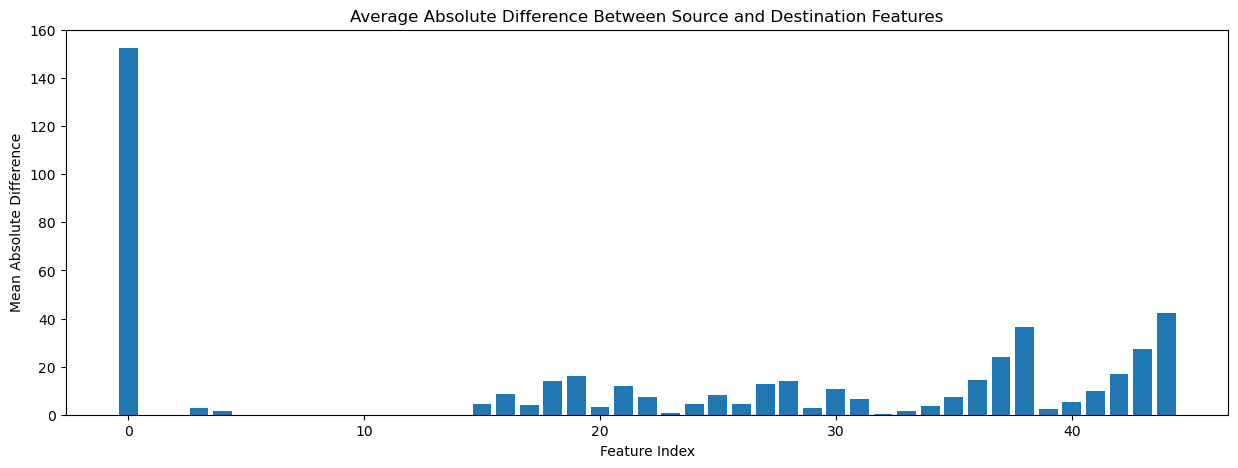

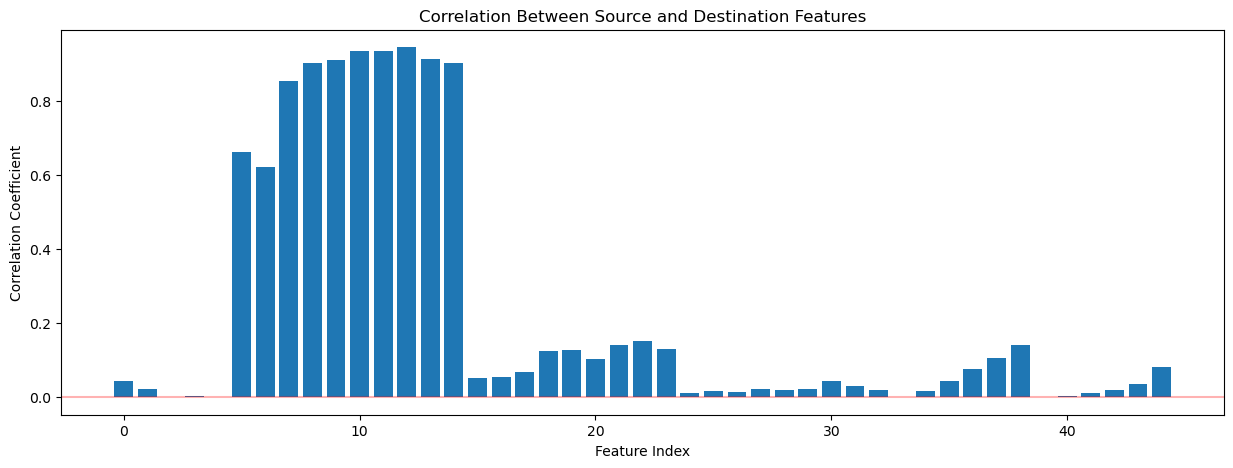


Features with highest correlation (most similar):
    Feature  Correlation
12       13     0.946059
11       12     0.936074
10       11     0.935456
13       14     0.913677
9        10     0.910545
14       15     0.903480
8         9     0.903225
7         8     0.853728
5         6     0.663518
6         7     0.623077

Features with lowest correlation (most different):
    Feature  Correlation
4         5    -0.000396
2         3    -0.000063
39       40     0.000230
33       34     0.001162
40       41     0.001634
3         4     0.003609
41       42     0.011009
24       25     0.011063
26       27     0.013733
34       35     0.015157

Features with smallest absolute differences:
    Feature  Mean_Abs_Diff
9        10       0.000016
11       12       0.000023
13       14       0.000025
12       13       0.000027
8         9       0.000028
5         6       0.000035
10       11       0.000035
14       15       0.000036
7         8       0.000038
6         7       0.000048

Fea

In [23]:
print("=== Source-Destination Feature Analysis ===")

# Calculate feature differences and correlations
feature_diffs = source_features.values - dest_features.values
feature_diff_means = np.mean(np.abs(feature_diffs), axis=0)
feature_correlations = [np.corrcoef(source_features[f'source_feature_{i}'], 
                                  dest_features[f'destination_feature_{i}'])[0,1] 
                       for i in range(1,46)]

# Plot average absolute differences
plt.figure(figsize=(15, 5))
plt.bar(range(len(feature_diff_means)), feature_diff_means)
plt.title('Average Absolute Difference Between Source and Destination Features')
plt.xlabel('Feature Index')
plt.ylabel('Mean Absolute Difference')
plt.show()

# Plot correlations
plt.figure(figsize=(15, 5))
plt.bar(range(len(feature_correlations)), feature_correlations)
plt.title('Correlation Between Source and Destination Features')
plt.xlabel('Feature Index')
plt.ylabel('Correlation Coefficient')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.show()

# Print summary statistics
print("\nFeatures with highest correlation (most similar):")
corr_df = pd.DataFrame({
    'Feature': range(1,46),
    'Correlation': feature_correlations
})
print(corr_df.nlargest(10, 'Correlation'))

print("\nFeatures with lowest correlation (most different):")
print(corr_df.nsmallest(10, 'Correlation'))

print("\nFeatures with smallest absolute differences:")
diff_df = pd.DataFrame({
    'Feature': range(1,46),
    'Mean_Abs_Diff': feature_diff_means
})
print(diff_df.nsmallest(10, 'Mean_Abs_Diff'))

print("\nFeatures with largest absolute differences:")
print(diff_df.nlargest(10, 'Mean_Abs_Diff'))


/var/folders/75/4b4y2mlx2yv_34rkxb83ydkr0000gn/T/ipykernel_99823/4088802484.py:29: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axes[i].set_xlim(q1, q3)


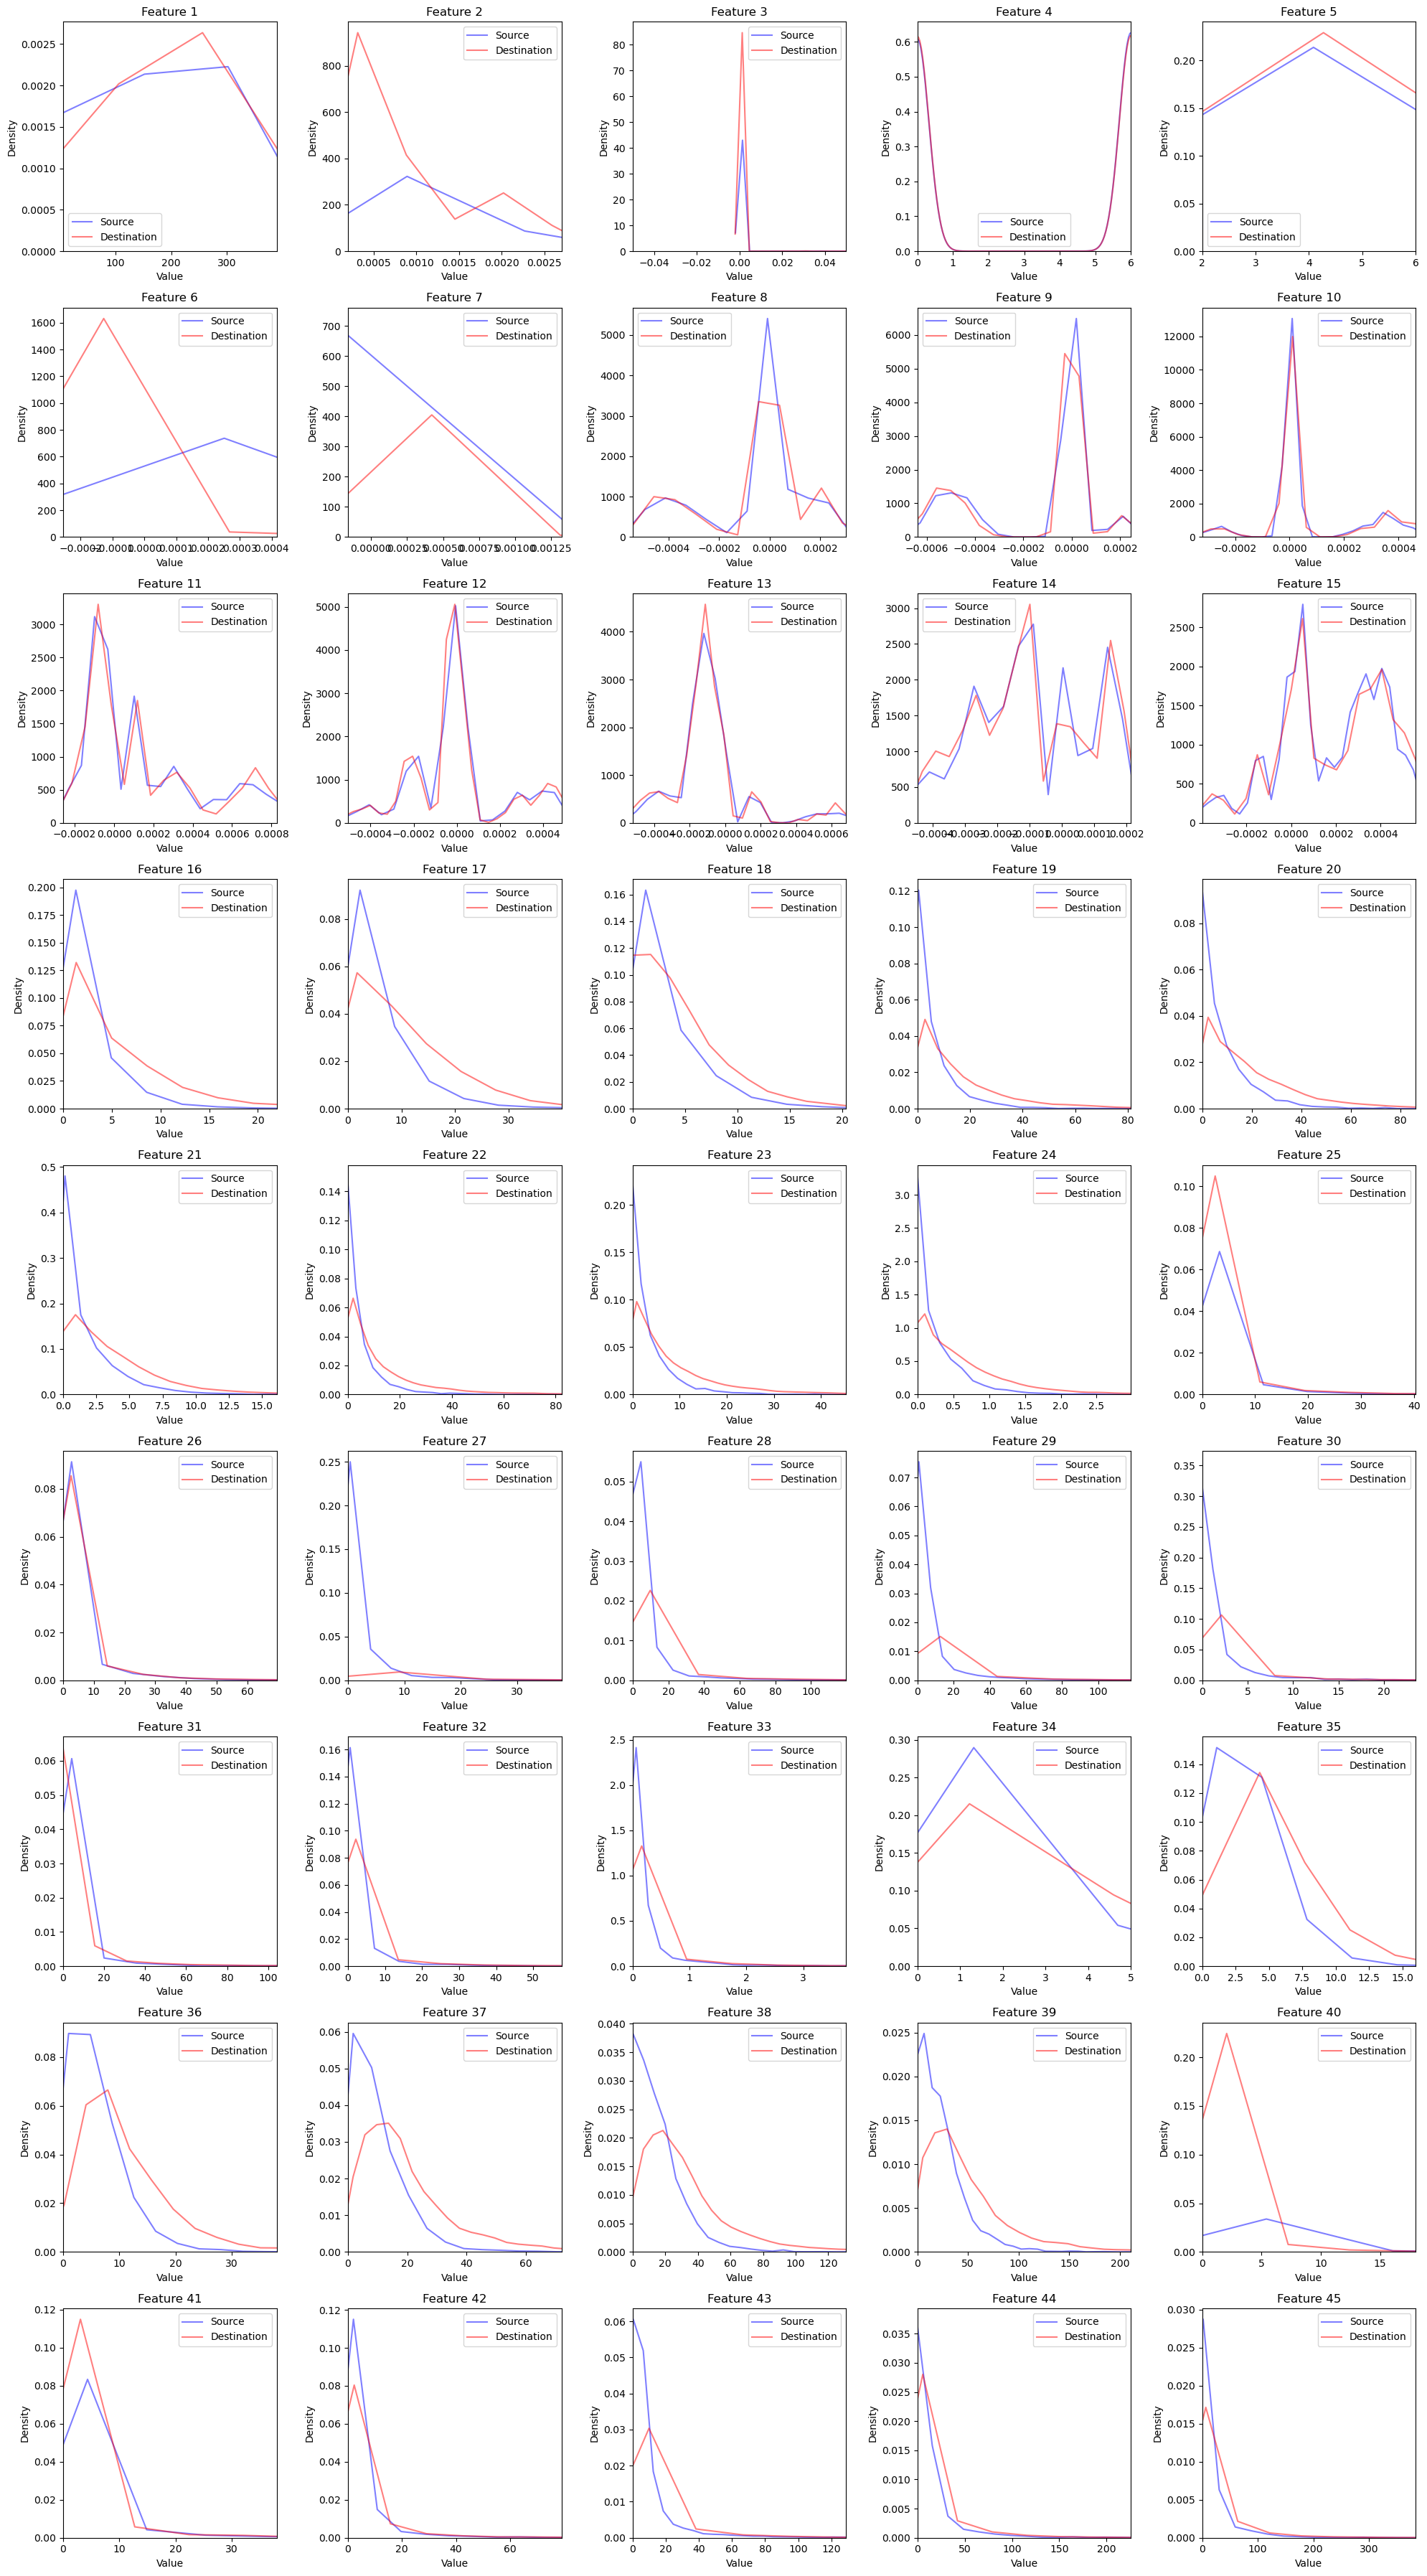


Feature Statistics:

Feature 1:
Source mean: 207.921, std: 476.073
Destination mean: 208.701, std: 621.719

Feature 2:
Source mean: 0.001, std: 0.002
Destination mean: 0.001, std: 0.001

Feature 3:
Source mean: 0.000, std: 0.006
Destination mean: 0.000, std: 0.006

Feature 4:
Source mean: 3.046, std: 2.999
Destination mean: 3.006, std: 3.000

Feature 5:
Source mean: 3.627, std: 12.971
Destination mean: 3.970, std: 12.388

Feature 6:
Source mean: -0.000, std: 0.002
Destination mean: -0.000, std: 0.001

Feature 7:
Source mean: 0.000, std: 0.003
Destination mean: 0.000, std: 0.001

Feature 8:
Source mean: -0.000, std: 0.000
Destination mean: -0.000, std: 0.000

Feature 9:
Source mean: -0.000, std: 0.000
Destination mean: -0.000, std: 0.000

Feature 10:
Source mean: 0.000, std: 0.000
Destination mean: 0.000, std: 0.000

Feature 11:
Source mean: 0.000, std: 0.000
Destination mean: 0.000, std: 0.000

Feature 12:
Source mean: 0.000, std: 0.000
Destination mean: 0.000, std: 0.000

Feature 13:

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create figure with subplots arranged in a grid
n_features = 45
n_cols = 5
n_rows = (n_features + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4*n_rows))
axes = axes.flatten()

# For each feature
for i in range(n_features):
    source_data = df[f'source_feature_{i+1}']
    dest_data = df[f'destination_feature_{i+1}']
    
    # Create density plot
    sns.kdeplot(data=source_data, ax=axes[i], color='blue', alpha=0.5, label='Source')
    sns.kdeplot(data=dest_data, ax=axes[i], color='red', alpha=0.5, label='Destination')
    
    # Set titles and labels
    axes[i].set_title(f'Feature {i+1}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Density')
    axes[i].legend()
    
    # Optional: Set x-axis limits to focus on the main distribution
    q1, q3 = np.percentile(np.concatenate([source_data, dest_data]), [1, 99])
    axes[i].set_xlim(q1, q3)

# Remove any empty subplots
for i in range(n_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Print basic statistics for each feature
print("\nFeature Statistics:")
for i in range(n_features):
    print(f"\nFeature {i+1}:")
    print("Source mean: {:.3f}, std: {:.3f}".format(
        df[f'source_feature_{i+1}'].mean(), 
        df[f'source_feature_{i+1}'].std()
    ))
    print("Destination mean: {:.3f}, std: {:.3f}".format(
        df[f'destination_feature_{i+1}'].mean(), 
        df[f'destination_feature_{i+1}'].std()
    ))

/Users/walterwong/miniforge3/envs/dehnn_2/lib/python3.8/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: divide by zero encountered in divide
  return n/db/n.sum(), bin_edges
/Users/walterwong/miniforge3/envs/dehnn_2/lib/python3.8/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/var/folders/75/4b4y2mlx2yv_34rkxb83ydkr0000gn/T/ipykernel_99823/1871404580.py:32: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axes[i].set_xlim(q1, q3)


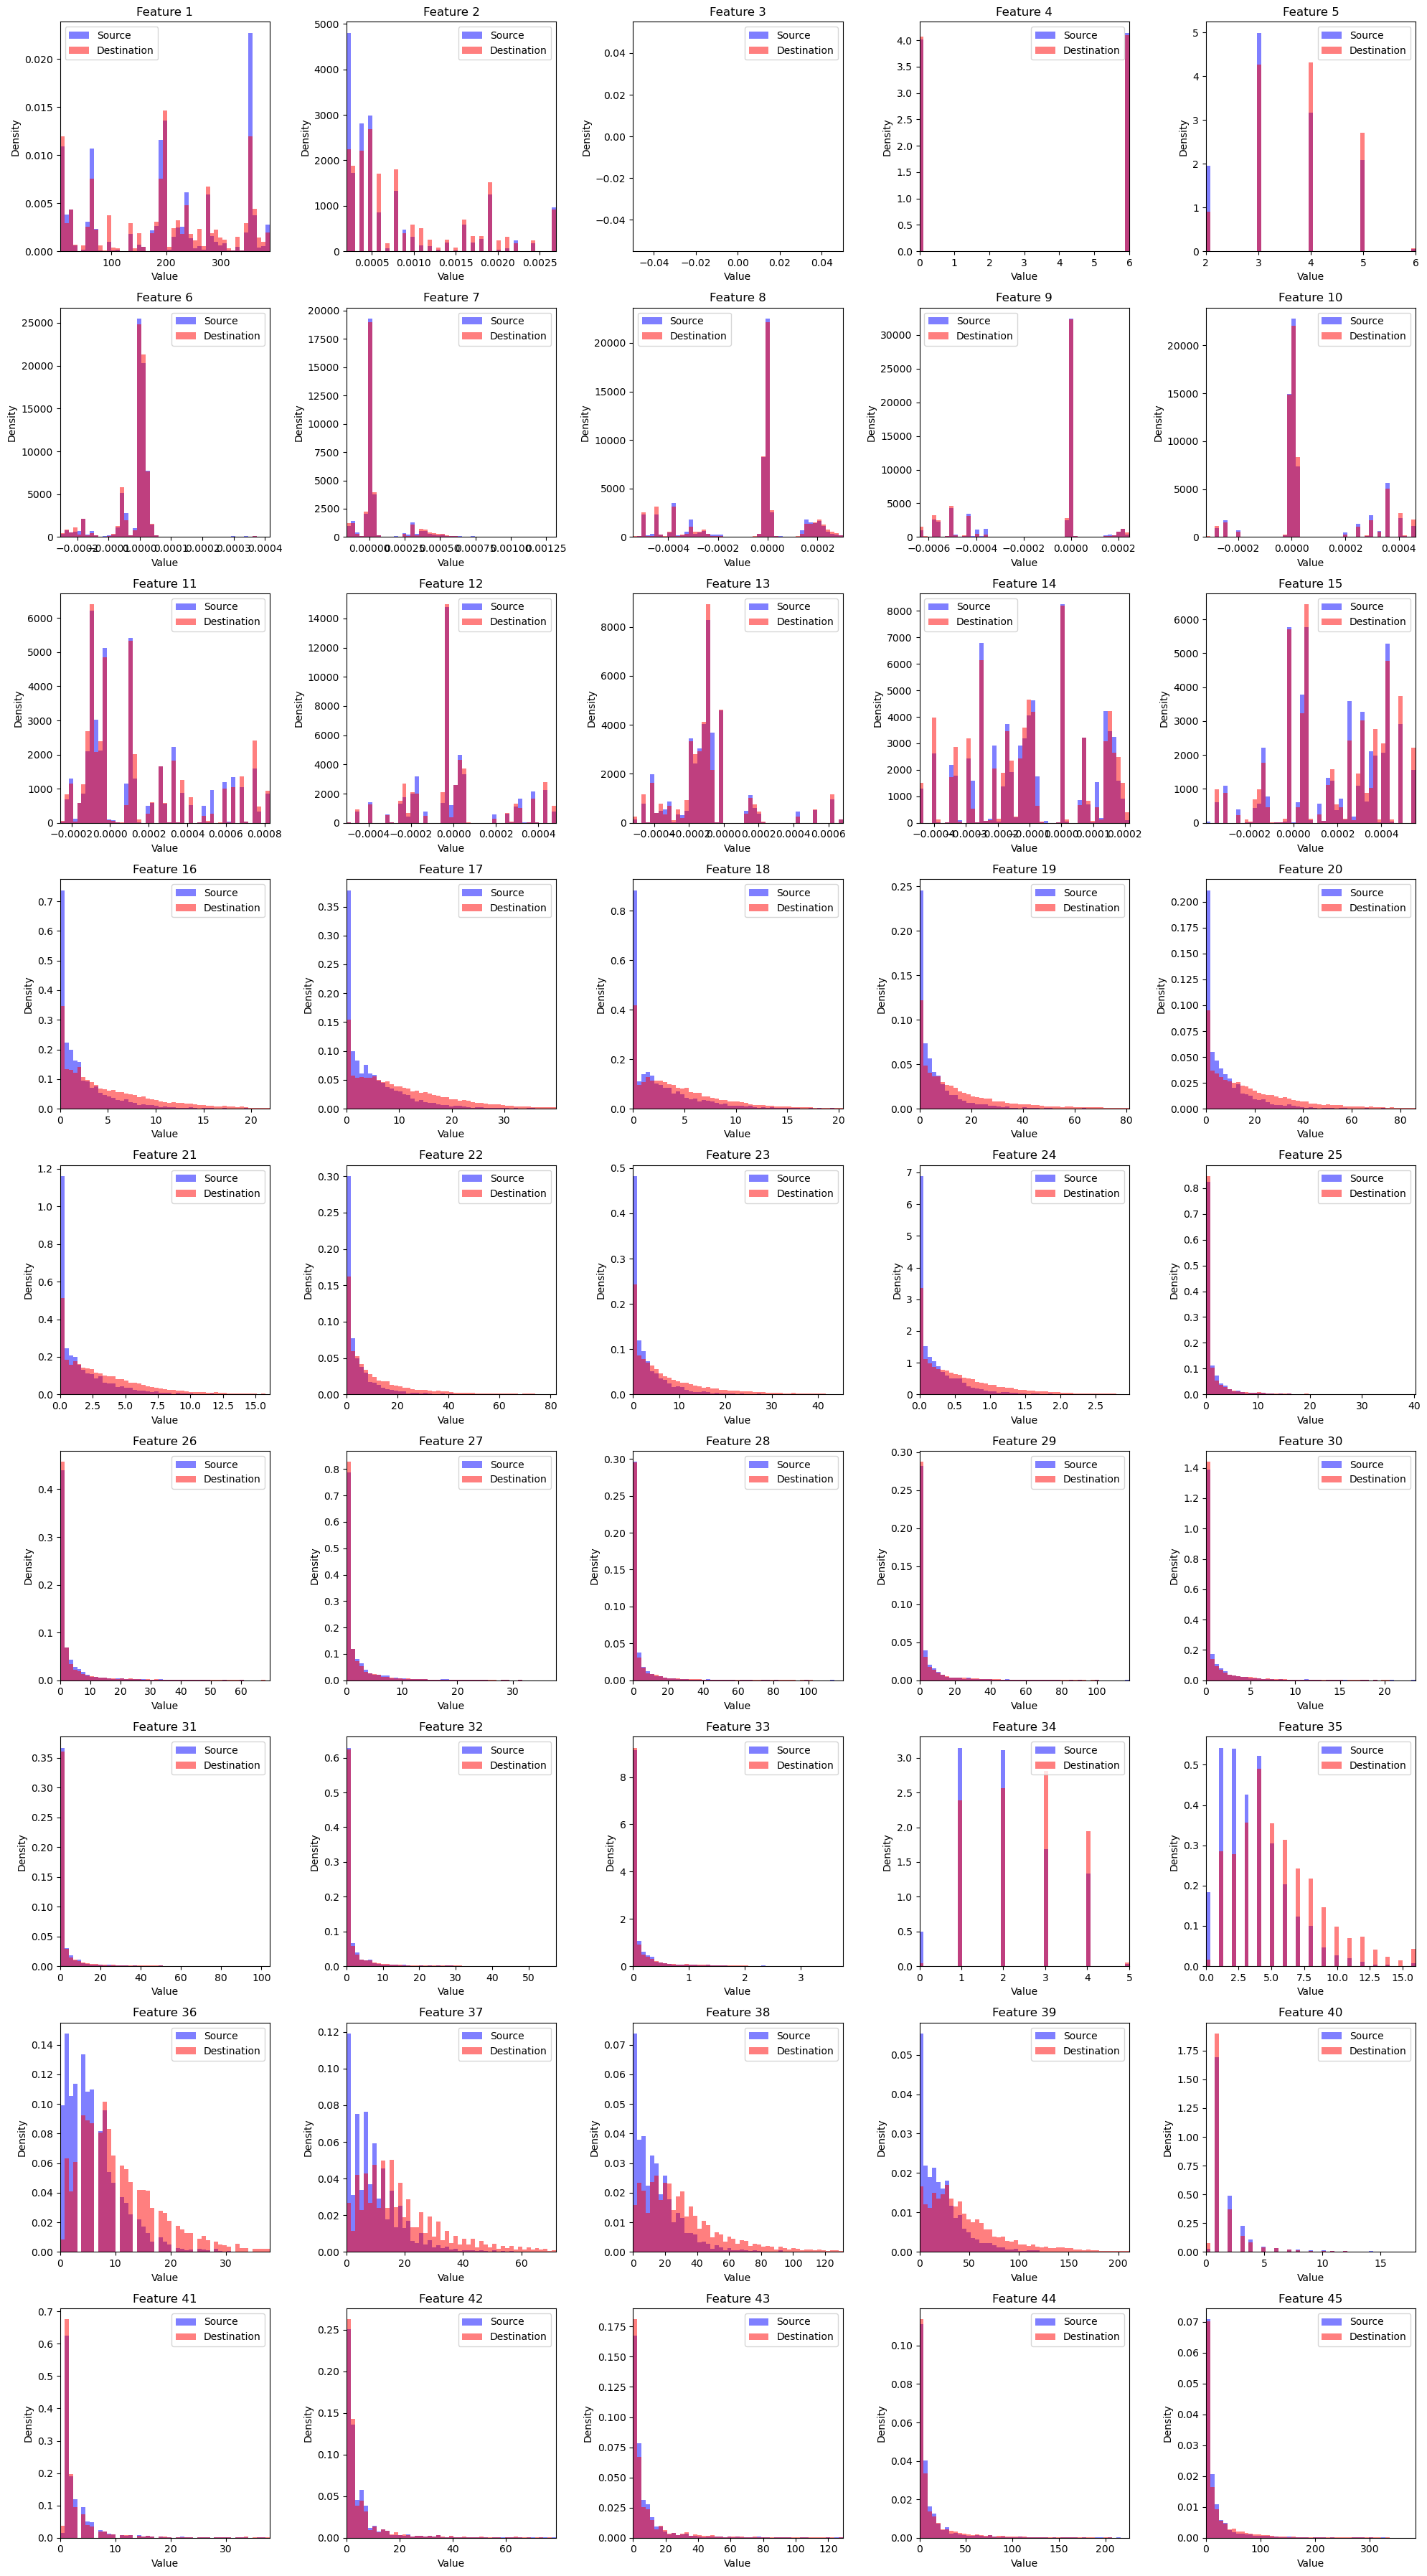


Feature Statistics:

Feature 1:
Source mean: 207.921, std: 476.073
Destination mean: 208.701, std: 621.719

Feature 2:
Source mean: 0.001, std: 0.002
Destination mean: 0.001, std: 0.001

Feature 3:
Source mean: 0.000, std: 0.006
Destination mean: 0.000, std: 0.006

Feature 4:
Source mean: 3.046, std: 2.999
Destination mean: 3.006, std: 3.000

Feature 5:
Source mean: 3.627, std: 12.971
Destination mean: 3.970, std: 12.388

Feature 6:
Source mean: -0.000, std: 0.002
Destination mean: -0.000, std: 0.001

Feature 7:
Source mean: 0.000, std: 0.003
Destination mean: 0.000, std: 0.001

Feature 8:
Source mean: -0.000, std: 0.000
Destination mean: -0.000, std: 0.000

Feature 9:
Source mean: -0.000, std: 0.000
Destination mean: -0.000, std: 0.000

Feature 10:
Source mean: 0.000, std: 0.000
Destination mean: 0.000, std: 0.000

Feature 11:
Source mean: 0.000, std: 0.000
Destination mean: 0.000, std: 0.000

Feature 12:
Source mean: 0.000, std: 0.000
Destination mean: 0.000, std: 0.000

Feature 13:

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure with subplots arranged in a grid
n_features = 45
n_cols = 5
n_rows = (n_features + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4*n_rows))
axes = axes.flatten()

# For each feature
for i in range(n_features):
    source_data = df[f'source_feature_{i+1}']
    dest_data = df[f'destination_feature_{i+1}']
    
    # Calculate common bins based on combined data range
    combined_data = np.concatenate([source_data, dest_data])
    q1, q3 = np.percentile(combined_data, [1, 99])
    bins = np.linspace(q1, q3, 50)  # 50 bins between 1st and 99th percentile
    
    # Create overlapping histograms
    axes[i].hist(source_data, bins=bins, color='blue', alpha=0.5, label='Source', density=True)
    axes[i].hist(dest_data, bins=bins, color='red', alpha=0.5, label='Destination', density=True)
    
    # Set titles and labels
    axes[i].set_title(f'Feature {i+1}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Density')
    axes[i].legend()
    
    # Set x-axis limits to focus on the main distribution
    axes[i].set_xlim(q1, q3)

# Remove any empty subplots
for i in range(n_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Print basic statistics for each feature
print("\nFeature Statistics:")
for i in range(n_features):
    print(f"\nFeature {i+1}:")
    print("Source mean: {:.3f}, std: {:.3f}".format(
        df[f'source_feature_{i+1}'].mean(), 
        df[f'source_feature_{i+1}'].std()
    ))
    print("Destination mean: {:.3f}, std: {:.3f}".format(
        df[f'destination_feature_{i+1}'].mean(), 
        df[f'destination_feature_{i+1}'].std()
    ))

In [27]:
corr_df.head(10)

,Feature,Correlation
0,1,0.043142
1,2,0.022074
2,3,-0.000063
3,4,0.003609
4,5,-0.000396
5,6,0.663518
6,7,0.623077
7,8,0.853728
8,9,0.903225
9,10,0.910545


In [26]:
corr_df.tail()

,Feature,Correlation
40,41,0.001634
41,42,0.011009
42,43,0.017916
43,44,0.034378
44,45,0.081603


In [110]:
file_path = "de_hnn/data/superblue/superblue_7/pyg_data.pkl"

# Open and load the file
with open(file_path, 'rb') as file:  # 'rb' mode opens the file in binary read mode
    data = torch.load(file)

# Display the data
print(data)

/var/folders/75/4b4y2mlx2yv_34rkxb83ydkr0000gn/T/ipykernel_27856/1371862485.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(file)


Data(node_features=[1319052, 45], net_features=[1339522, 11], edge_index_sink_to_net=[2, 3822194], edge_index_source_to_net=[2, 1333280], node_demand=[1319052], net_demand=[1339522], net_hpwl=[1339522], batch=[1319052], num_vn=164, pos_lst=[1319052, 2])


In [107]:
data

Data(node_features=[797938, 45], net_features=[821547, 11], edge_index_sink_to_net=[2, 2139121], edge_index_source_to_net=[2, 810946], node_demand=[797938], net_demand=[821547], net_hpwl=[821547], batch=[797938], num_vn=99, pos_lst=[797938, 2])

# VN Analylsis


In [7]:
vn_df = pd.read_csv('de_hnn/vn_features_init.csv')

In [8]:
vn_df.describe()

,design,vn_id,mean_feature_0,mean_feature_1,mean_feature_2,mean_feature_3,mean_feature_4,mean_feature_5,mean_feature_6,mean_feature_7,...,max_feature_35,max_feature_36,max_feature_37,max_feature_38,max_feature_39,max_feature_40,max_feature_41,max_feature_42,max_feature_43,max_feature_44
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1.199000e+03,1.199000e+03,1199.000000,...,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,8.131776,53.524604,194.436706,0.000970,0.000035,2.999715,3.722147,4.052785e-06,5.388006e-07,-0.000033,...,181.980817,221.048374,313.783987,424.763136,658.957465,1372.123436,2356.512927,3030.644704,3792.420350,4662.117598
std,5.449509,35.475650,55.175652,0.000270,0.000048,0.029424,0.394259,3.995490e-04,4.528508e-04,0.000496,...,248.150199,271.562420,338.468932,403.561073,925.483898,2699.622320,4522.576999,5070.571471,5946.811202,8612.109201
min,1.000000,0.000000,56.806725,0.000423,0.000000,2.883478,2.907533,-5.028663e-03,-5.074243e-03,-0.004104,...,16.000000,32.000000,53.000000,78.000000,18.000000,35.000000,64.000000,71.000000,71.000000,47.000000
25%,3.000000,24.500000,166.728317,0.000814,0.000003,2.981560,3.462347,-1.513577e-05,-1.717970e-05,-0.000035,...,53.000000,96.000000,140.000000,213.000000,207.500000,319.500000,512.500000,691.000000,963.000000,1241.500000
50%,7.000000,49.000000,198.099976,0.000927,0.000016,2.999880,3.670653,6.736715e-07,-1.508690e-06,-0.000005,...,90.000000,150.000000,220.000000,319.000000,397.000000,696.000000,1097.000000,1462.000000,1985.000000,2486.000000
75%,11.000000,78.000000,225.178810,0.001087,0.000055,3.018827,3.885267,6.764379e-06,4.085424e-06,0.000015,...,198.000000,209.500000,340.000000,474.500000,736.000000,1314.000000,2070.500000,3096.000000,4039.000000,4891.000000
max,19.000000,163.000000,1034.447510,0.002430,0.000543,3.090670,5.953631,5.133773e-03,5.375486e-03,0.006092,...,3008.000000,3555.000000,4028.000000,4896.000000,9555.000000,46235.000000,66306.000000,58241.000000,65521.000000,197808.000000


In [9]:
vn_df[vn_df['design'] == 1].describe()

,design,vn_id,mean_feature_0,mean_feature_1,mean_feature_2,mean_feature_3,mean_feature_4,mean_feature_5,mean_feature_6,mean_feature_7,...,max_feature_35,max_feature_36,max_feature_37,max_feature_38,max_feature_39,max_feature_40,max_feature_41,max_feature_42,max_feature_43,max_feature_44
count,99.0,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,9.900000e+01,99.000000,99.000000,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,1.0,49.000000,191.407557,0.000731,0.000041,2.992616,3.691624,-6.147054e-07,-0.000001,-0.000417,...,181.767677,165.707071,242.333333,401.757576,640.030303,1352.555556,2287.575758,2986.515152,4007.454545,4989.525253
std,0.0,28.722813,25.612393,0.000134,0.000049,0.027661,0.256496,1.853369e-04,0.000218,0.000018,...,245.156295,114.804559,155.599696,319.986418,633.223345,1704.412989,3379.651012,4622.316668,6263.928620,7685.107346
min,1.0,0.000000,122.331085,0.000481,0.000000,2.911347,3.215611,-1.792338e-03,-0.002150,-0.000473,...,18.000000,41.000000,65.000000,87.000000,33.000000,64.000000,142.000000,265.000000,315.000000,315.000000
25%,1.0,24.500000,175.772827,0.000639,0.000004,2.976993,3.504818,1.717900e-05,0.000018,-0.000426,...,47.000000,73.000000,128.500000,197.000000,195.000000,390.500000,723.500000,964.500000,1406.500000,1767.000000
50%,1.0,49.000000,194.276810,0.000708,0.000021,2.993014,3.640887,1.851729e-05,0.000019,-0.000417,...,55.000000,106.000000,172.000000,259.000000,354.000000,803.000000,1360.000000,1766.000000,2164.000000,3038.000000
75%,1.0,73.500000,207.535179,0.000809,0.000073,3.008914,3.808474,2.048985e-05,0.000021,-0.000406,...,179.000000,230.500000,351.000000,538.000000,901.000000,1318.000000,2108.500000,3072.000000,3897.000000,5215.500000
max,1.0,98.000000,283.678497,0.001283,0.000256,3.070104,4.552415,1.534315e-04,0.000043,-0.000366,...,766.000000,377.000000,597.000000,1429.000000,4085.000000,9802.000000,21836.000000,34672.000000,50371.000000,60154.000000


In [3]:
d1_nodes_df = pd.read_csv('superblue1_node_features.csv')

In [5]:
d1_nodes_df.describe()

,node_id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45
count,797938.000000,797938.000000,797938.000000,797938.000000,797938.000000,797938.000000,797938.000000,797938.000000,797938.000000,797938.000000,...,797938.000000,797938.000000,797938.000000,797938.000000,797938.000000,797938.000000,797938.000000,797938.000000,797938.000000,797938.000000
mean,398968.500000,190.796618,0.000726,0.000038,2.993062,3.695684,-0.000001,-0.000002,-0.000417,-0.000470,...,6.234214,9.860421,15.287071,22.579944,2.448207,4.231658,7.020289,10.914857,16.574744,24.375836
std,230345.003886,501.489037,0.000952,0.003173,2.999635,5.664572,0.000792,0.000792,0.000673,0.000637,...,6.359559,9.475047,15.484828,24.701127,15.733482,30.564312,56.119609,79.877253,115.160177,162.027771
min,0.000000,6.000000,0.000200,0.000000,0.000000,0.000000,-0.040357,-0.038975,-0.125327,-0.219009,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199484.250000,56.000000,0.000300,0.000000,0.000000,3.000000,0.000015,0.000016,-0.000495,-0.000557,...,2.000000,3.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,398968.500000,187.000000,0.000500,0.000000,0.000000,3.000000,0.000019,0.000020,-0.000383,-0.000432,...,5.000000,8.000000,12.000000,17.000000,1.000000,2.000000,2.000000,3.000000,4.000000,5.000000
75%,598452.750000,275.000000,0.000800,0.000000,6.000000,5.000000,0.000022,0.000023,-0.000383,-0.000432,...,9.000000,14.000000,22.000000,33.000000,2.000000,3.000000,5.000000,8.000000,12.000000,16.000000
max,797937.000000,21217.000000,0.182809,0.585508,6.000000,1243.000000,0.002488,0.000398,0.246572,0.148587,...,766.000000,377.000000,597.000000,1429.000000,4085.000000,9802.000000,21836.000000,34672.000000,50371.000000,60154.000000


I think for VNs, they are slightly oversmoothed and susceptible to outliers, but that is okay, as want the severely congested, etc cells to be significant.